# 13.1.1 Basic knowledge of Python class

In [1]:
class ExampleOne(object):
    pass

In [2]:
c = ExampleOne()

In [3]:
c.__str__()

'<__main__.ExampleOne object at 0x7fccc8592050>'

In [4]:
type(c)

__main__.ExampleOne

In [5]:
class ExampleTwo(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [6]:
c = ExampleTwo(1, 'txt')

In [7]:
c.a

1

In [8]:
c.b

'txt'

In [9]:
c.a = 100

In [10]:
c.a

100

In [11]:
c = ExampleOne()

In [12]:
c.first_name = 'Jason'
c.laset_name = 'Bourne'
c.movies = 4
print c.first_name, c.laset_name, c.movies

Jason Bourne 4


In [13]:
class ExampleThree(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def addition(self):
        return self.a + self.b

In [14]:
c = ExampleThree(1, 5)

In [15]:
c.addition()

6

In [16]:
c.a += 10

In [17]:
c.addition()

16

In [18]:
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [19]:
c = ExampleFour(10, 15)
c.addition()

25

In [20]:
class ExampleFive(ExampleFour):
    def multiplication(self):
        return self.a * self.b

In [21]:
c = ExampleFive(20,15)

In [22]:
c.addition()

35

In [23]:
c.multiplication()

300

In [24]:
def multi(self):
    return self.a * self.b

In [25]:
class ExampleSix(ExampleFour):
    multiplication = multi

In [26]:
c = ExampleSix(10, 15)

In [27]:
c.multiplication()

150

In [28]:
class ExampleSeven(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.__sum = a + b
    def addition(self):
        return self.__sum

In [29]:
c = ExampleSeven(10, 25)
c.addition()
c.__sum

AttributeError: 'ExampleSeven' object has no attribute '__sum'

In [31]:
c._ExampleSeven__sum

35

In [32]:
c.a += 10
c.a

20

In [33]:
name_list = ['Sandra', 'Lilli', 'Guido', 'Zorro', 'Henry']

In [35]:
class sorted_class(object):
    def __init__(self, elements):
        self.elements = sorted(elements)
    def __iter__(self):
        self.position = -1
        return self
    def next(self):
        if self.position == len(self.elements) - 1:
            raise StopIteration
        self.position += 1
        return self.elements[self.position]

In [36]:
sorted_name_list = sorted_class(name_list)

In [37]:
for name in sorted_name_list:
    print name

Guido
Henry
Lilli
Sandra
Zorro


In [38]:
type(sorted_class(name_list))

__main__.sorted_class

# 13.1.2 Simple short-term interest class

In [39]:
import numpy as np
def discount_factor(r, t):
    ''' Function to calculate discount factor'''
    df = np.exp(-r * t)
    return df

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

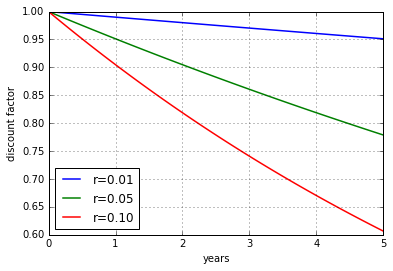

In [41]:
t = np.linspace(0, 5)
for r in [.01, .05, .1]:
    plt.plot(t, discount_factor(r, t), label = 'r=%4.2f' % r, lw = 1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc = 0)

In [42]:
class short_rate(object):
    def __init__(self, name, rate):
        self.name = name
        self.rate = rate
    def get_discount_factors(self, time_list):
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [43]:
sr = short_rate('r', 0.05)
sr.name, sr.rate

('r', 0.05)

In [44]:
time_list = [0.0, .5, 1., 1.25, 1.75, 2.]
sr.get_discount_factors(time_list)

array([ 1.        ,  0.97530991,  0.95122942,  0.93941306,  0.91621887,
        0.90483742])

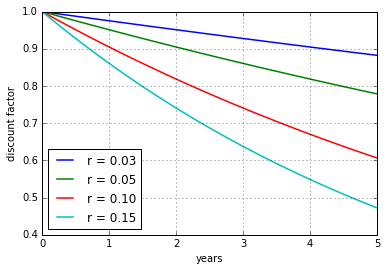

In [45]:
for r in [.025, .05, .1, .15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t), label = 'r = %4.2f' % sr.rate, lw = 1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc = 0)

In [46]:
sr.rate = .05
cash_flows = np.array([-100, 50,75])
time_list = [.0, 1.0, 2.0]

In [47]:
disc_facts = sr.get_discount_factors(time_list)

In [48]:
print disc_facts

[ 1.          0.95122942  0.90483742]


In [49]:
#present value
disc_facts * cash_flows

array([-100.        ,   47.56147123,   67.86280635])

In [50]:
#net present value
np.sum(disc_facts * cash_flows)

15.424277577732667

In [51]:
sr.rate = .15
np.sum(sr.get_discount_factors(time_list) * cash_flows)

-1.4032346276182679

# 13.1.3 Cash flow series class

In [52]:
class cash_flow_series(object):
    def __init__(self, name, time_list, cash_flows, short_rate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = short_rate
    def present_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows) * df
    def net_present_value(self):
        return np.sum(self.present_value_list())

In [53]:
sr.rate = .05
cfs = cash_flow_series('cfs', time_list, cash_flows, sr)

In [54]:
cfs.cash_flows

array([-100,   50,   75])

In [55]:
cfs.time_list

[0.0, 1.0, 2.0]

In [56]:
cfs.present_value_list()

array([-100.        ,   47.56147123,   67.86280635])

In [57]:
cfs.net_present_value()

15.424277577732667

In [58]:
class cfs_sensitivity(cash_flow_series):
    def npv_sensitivity(self, short_rates):
        npvs = list()
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_present_value())
        return np.array(npvs)

In [59]:
cfs_sens = cfs_sensitivity('cfs', time_list, cash_flows, sr)

In [60]:
short_rates = [.01, .025, .05, .075, .1, .125, .15, .2]
npvs = cfs_sens.npv_sensitivity(short_rates)

In [61]:
npvs

array([ 23.01739219,  20.10770244,  15.42427758,  10.94027255,
         6.64667738,   2.53490386,  -1.40323463,  -8.78945889])

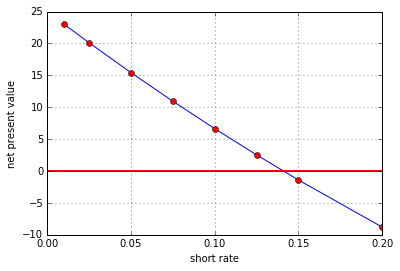

In [62]:
plt.plot(short_rates, npvs, 'b')
plt.plot(short_rates, npvs, 'ro')
plt.plot((0, max(short_rates)), (0,0), 'r', lw = 2)
plt.grid(True)
plt.xlabel('short rate')
plt.ylabel('net present value')

# 13.2 GUI

# 13.2.1 short term interest class with GUI

In [63]:
import traits.api as trapi

In [64]:
class short_rate(trapi.HasTraits):
    name = trapi.Str
    rate = trapi.Float
    time_list = trapi.Array(dtype = np.float, shape = (5,))
    def get_discount_factors(self):
        return np.exp(-self.rate * self.time_list)

In [65]:
sr = short_rate()

In [67]:
sr.configure_traits()

ValueError: API 'QString' has already been set to version 1